In [16]:
import re
import nltk
import spacy
import codecs
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [18]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [19]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [20]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8932\189547753.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(160)):


  0%|          | 0/160 [00:00<?, ?it/s]

In [22]:
df=pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,Reviewed in India on 2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",Reviewed in India on 5 March 2024
3,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,Reviewed in India on 6 March 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
...,...,...,...,...
105,5.0 out of 5 stars\nValue for money,5.0,Very happy...love it,Reviewed in India on 2 February 2024
106,5.0 out of 5 stars\ngood,5.0,good,Reviewed in India on 14 February 2024
107,5.0 out of 5 stars\nBoat Smart Watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 1 February 2024
108,5.0 out of 5 stars\nNice,5.0,Very good product,Reviewed in India on 11 February 2024


In [23]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [24]:
df.head(50)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",5 March 2024
3,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
5,4.0 out of 5 stars\nGood watch for all but req...,4.0,My experience with the boAt Xtend Call Plus Sm...,30 May 2023
6,5.0 out of 5 stars\nVery awesome,5.0,Good product and also very good packaging very...,6 March 2024
7,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,9 February 2024
8,4.0 out of 5 stars\nBettary life good,4.0,Face pic not allowed in face watch and working...,5 February 2024
9,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022


In [25]:
df.to_csv("BoatSmartWatch_Review.csv")

In [26]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",5 March 2024
3,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
...,...,...,...,...
105,5.0 out of 5 stars\nValue for money,5.0,Very happy...love it,2 February 2024
106,5.0 out of 5 stars\ngood,5.0,good,14 February 2024
107,5.0 out of 5 stars\nBoat Smart Watch,5.0,The media could not be loaded.\n ...,1 February 2024
108,5.0 out of 5 stars\nNice,5.0,Very good product,11 February 2024


In [27]:
reviews.Rating.describe()

count    110.000000
mean       4.227273
std        0.658872
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [28]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       107 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [29]:
reviews.describe()

,Rating
count,110.000000
mean,4.227273
std,0.658872
min,3.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [30]:
reviews.isnull().sum()

Title          0
Rating         0
Review         3
Review_Date    0
dtype: int64

In [31]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",5 March 2024
3,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022


In [72]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I am using smart watch for the first time. Mod...
1    His smart (model Coat extend plus) watch is sa...
2    Very good ,nice and worth for money, super pro...
3    Looks so good... Easy to use. Charging fast. C...
4    Shipping the parts mostly covered in other rev...
Name: Review, dtype: object

In [73]:
boat_review = reviews[['Review']]
boat_review

,Review
0,I am using smart watch for the first time. Mod...
1,This smart (model Boat extend plus) watch is f...
2,"Very good ,nice and worth for money, super pro..."
3,Looks so good... Easy to use. Charging fast. C...
4,Skipping the parts mostly covered in other rev...
...,...
105,Very happy...love it
106,good
107,The media could not be loaded.\n ...
108,Very good product


In [74]:
boat_review.reset_index(drop=True, inplace=True)

In [75]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8932\1773927281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))


In [76]:
lemmatizer = WordNetLemmatizer()
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8932\349396708.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, len(boat_review))):


  0%|          | 0/107 [00:00<?, ?it/s]

In [77]:
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...


In [78]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [79]:
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,good product also good packaging impressive,good product also good packaging impressive
7,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
8,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
9,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...


In [80]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,good product also good packaging impressive,good product also good packaging impressive
7,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
8,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
9,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...


In [81]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,good product also good packaging impressive,good product also good packaging impressive
7,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
8,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
9,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...


In [82]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,good product also good packaging impressive,good product also good packaging impressive
7,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
8,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
9,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...


In [83]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [84]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,good product also good packaging impressive,good product also good packaging impressive
7,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
8,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
9,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...


In [85]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])


a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [86]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [87]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,good product also good packaging impressive,good product also good packaging impressive
7,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
8,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
9,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...


In [88]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['smart', 'model', 'boat', 'extend', 'plus', 'watch', 'functioning', 'well', 'worth', 'price', 'r', 'battery', 'beginning', 'lasted', 'day', 'next', 'charge', 'lasted', 'day', 'last', 'settled', 'one', 'day', 'extensive', 'user', 'apps', 'amoled', 'display', 'good', 'touch', 'feature', 'good', 'access', 'apps', 'easily', 'reachable', 'simple', 'browsing', 'feature', 'sleep', 'measurement', 'good', 'taking', 'day', 'time', 'nap', 'night', 'time', 'showing', 'exactly', 'went', 'sleep', 'woke', 'spo', 'measurement', 'neaarer', 'measurement', 'personal', 'digital', 'instrument', 'heart', 'rate', 'measurement', 'also', 'nearer', 'instrument', 'stress', 'also', 'reflecting', 'nearly', 'real', 'condition', 'activity', 'step', 'showing', 'correct', 'distance', 'also', 'good', 'watch', 'taking', 'bike', 'ride', 'walking', 'showing', 'distance', 'covered', 'set', 'target', 'sport', 'feature', 'checked', 'yet', 'fully', 'checked', 'feature', 'functional', 'water', 'resistant', 'yes', 'wa

In [89]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [using, smart, watch, first, time, model, xten...
1    [smart, model, boat, extend, plus, watch, func...
2           [good, nice, worth, money, super, product]
3    [look, good, easy, use, charging, fast, charge...
4    [skipping, part, mostly, covered, review, spon...
5    [experience, boat, xtend, call, plus, smart, w...
6    [good, product, also, good, packaging, impress...
7    [smart, watch, good, value, money, feature, pa...
8    [face, pic, allowed, face, watch, working, bes...
9    [review, overviewaverage, boat, today, launche...
Name: Clean_Reviews, dtype: object

In [90]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...,"[using, smart, watch, first, time, model, xten..."
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
2,good nice worth money super product,"very good ,nice worth money, super product","[good, nice, worth, money, super, product]"
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...,"[look, good, easy, use, charging, fast, charge..."
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...,"[experience, boat, xtend, call, plus, smart, w..."
6,good product also good packaging impressive,good product also good packaging impressive,"[good, product, also, good, packaging, impress..."
7,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...,"[smart, watch, good, value, money, feature, pa..."
8,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...,"[face, pic, allowed, face, watch, working, bes..."
9,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."


In [91]:
stemmer = SnowballStemmer("english")

In [92]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,use smart watch first time model xtend boat rt...
1,smart model boat extend plus watch function we...
2,good nice worth money super product
3,look good easi use charg fast charg stay long ...
4,skip part most cover review sponsor yt one add...
...,...
102,happi love
103,good
104,medium could load year use watch qualiti say f...
105,good product


In [93]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy


,stemmed
0,using smart watch first time model xtend boat ...
1,smart model boat extend plus watch functioning...
2,good nice worth money super product
3,look good easy use charging fast charge stay l...
4,skipping part mostly covered review sponsored ...
...,...
102,happy love
103,good
104,medium could loaded year using watch quality s...
105,good product


In [94]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [95]:
print(cv.get_feature_names()[109:200])

['beautiful', 'bed', 'beginning', 'believe', 'beneficial', 'benefitsnow', 'best', 'better', 'beyond', 'bezel', 'big', 'bike', 'bip', 'birthday', 'bit', 'black', 'bloated', 'blood', 'blue', 'bluetooth', 'boat', 'body', 'bother', 'bought', 'box', 'boyfriend', 'bp', 'bpm', 'brand', 'break', 'breath', 'breathing', 'bright', 'brightness', 'brings', 'broken', 'browsing', 'brushed', 'bt', 'budget', 'bug', 'build', 'buildi', 'built', 'bulb', 'burn', 'burnt', 'button', 'buy', 'buyer', 'buying', 'cable', 'cache', 'calculated', 'calculating', 'calculation', 'calculator', 'calender', 'call', 'called', 'caller', 'callin', 'calling', 'calorie', 'calory', 'cals', 'camera', 'cannot', 'carddesign', 'care', 'cart', 'case', 'category', 'catering', 'center', 'centerbefore', 'chahiye', 'change', 'changed', 'charge', 'charger', 'charging', 'charm', 'cheap', 'check', 'checked', 'checking', 'chennai', 'child', 'childish', 'chinese']


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [96]:
print(cv.get_feature_names()[:100])

['aaj', 'able', 'absolutely', 'ac', 'accept', 'acceptable', 'acceptance', 'accepts', 'access', 'accessibility', 'accidentally', 'account', 'accuracy', 'accuracybatteryyou', 'accuracycomparing', 'accurate', 'accurately', 'ach', 'ackward', 'acticity', 'activate', 'activating', 'active', 'activites', 'activity', 'actual', 'actually', 'adapter', 'add', 'added', 'addition', 'adjust', 'advanced', 'advertised', 'aggregate', 'ago', 'alarm', 'alert', 'alexa', 'allowed', 'allowing', 'almost', 'along', 'also', 'alternative', 'aluminium', 'always', 'amaze', 'amazfit', 'amazing', 'amazon', 'amoled', 'amount', 'analog', 'android', 'angle', 'animal', 'animation', 'anniversary', 'another', 'answer', 'anyonefor', 'anything', 'anywhere', 'aod', 'apart', 'app', 'appaccuracyaccuracy', 'appaccuracybatteryfinal', 'appearance', 'appeared', 'apple', 'application', 'apps', 'appyou', 'around', 'arre', 'asakte', 'aside', 'asks', 'aspect', 'assistant', 'assisted', 'atm', 'attached', 'attaching', 'attention', 'att

In [97]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [98]:
dataframe = dataframe.reset_index(drop=True)

In [99]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8932\781968268.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, len(dataframe))):


  0%|          | 0/107 [00:00<?, ?it/s]

In [100]:
corpus[3]

'look good easi use charg fast charg stay long time'

In [101]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [102]:
X.shape

(107, 1546)

In [103]:
cv.get_feature_names()[:20]

['accept',
 'access',
 'accur',
 'accuraci',
 'activ',
 'activ includ',
 'activ step',
 'actual',
 'ad',
 'add',
 'ago',
 'alarm',
 'alarm set',
 'alarm timer',
 'alert',
 'alexa',
 'alexa support',
 'alexa watch',
 'alexa work',
 'allow']

In [104]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [105]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,accept,access,accur,accuraci,activ,activ includ,activ step,actual,ad,add,...,wrist,xtend,xtend boat,xtend call,xtend call plu,xtend smartwatch,xtend watch,ye,year,yt one
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,6,0,1,1,0,3,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8932\3849003634.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, len(dataframe))):


  0%|          | 0/107 [00:00<?, ?it/s]

In [107]:
corpus[4]

'skip part mostli cover review sponsor yt one add irrit common sens disappoint notic sinc last day actual usag smart watch aod show date day week show hour min way configur beyond analog digit view also get turn start exercis activ like walk screen go dark go walk calori count home screen anywher els show step count calori aggreg calori burnt exercis activ e step cal cycl show home screen separ two entri app smart enough addit quick way go start activ exercis first press side button twice select activit list menu versu swipe home screen go utterli useless cricket score screen instead mani even use customis menu option function map provid touch wake display avail screen avail rupe yr old huwai band one press side button everi time see home screen utterli inconveni reach day night time auto configur aod twist wake provid make irrit sleep hour kept thu daili two time day task enabl disabl featur manual everi freak day kindli also note indic whatsoev aod start exercis activ start one like 

In [108]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [109]:
X.shape

(107, 1546)

In [110]:
tfidf_v.get_feature_names()[:20]

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['accept',
 'access',
 'accur',
 'accuraci',
 'activ',
 'activ includ',
 'activ step',
 'actual',
 'ad',
 'add',
 'ago',
 'alarm',
 'alarm set',
 'alarm timer',
 'alert',
 'alexa',
 'alexa support',
 'alexa watch',
 'alexa work',
 'allow']

In [111]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [112]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

,accept,access,accur,accuraci,activ,activ includ,activ step,actual,ad,add,...,wrist,xtend,xtend boat,xtend call,xtend call plu,xtend smartwatch,xtend watch,ye,year,yt one
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.119701,0.139891,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0000
1,0.000000,0.033858,0.0,0.000000,0.030285,0.0,0.039569,0.000000,0.0,0.000000,...,0.037797,0.000000,0.000000,0.0,0.0,0.0,0.0,0.067716,0.000000,0.0000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0000
4,0.026652,0.023874,0.0,0.023874,0.128129,0.0,0.027901,0.024681,0.0,0.079955,...,0.026652,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0000
103,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0000
104,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.267918,0.0000
105,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0000


In [113]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'using smart watch first time model xtend boat rtl give smart look easy use day battery backup comfortable fully satisfied highly recommend buy one thing hurt bought watch r amazon today price reduced r wish amazon concern retailer refund r bought watch single cart smart model boat extend plus watch functioning well worth price r battery beginning lasted day next charge lasted day last settled one day extensive user apps amoled display good touch feature good access apps easily reachable simple browsing feature sleep measurement good taking day time nap night time showing exactly went sleep woke spo measurement neaarer measurement personal digital instrument heart rate measurement also nearer instrument stress also reflecting nearly real condition activity step showing correct distance also good watch taking bike ride walking showing distance covered set target sport feature checked yet fully checked feature functional water resistant yes water resistant checked bathing drizzle rain ti

In [115]:
nlp = spacy.load('en_core_web_sm')

In [116]:
one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [117]:
for token in doc_block[:50]:
    print(token,token.pos_)

using VERB
smart ADJ
watch NOUN
first ADJ
time NOUN
model NOUN
xtend PROPN
boat PROPN
rtl NOUN
give VERB
smart ADJ
look NOUN
easy ADJ
use NOUN
day NOUN
battery NOUN
backup NOUN
comfortable ADJ
fully ADV
satisfied ADJ
highly ADV
recommend NOUN
buy VERB
one NUM
thing NOUN
hurt NOUN
bought VERB
watch VERB
r NOUN
amazon NOUN
today NOUN
price NOUN
reduced VERB
r NOUN
wish NOUN
amazon PROPN
concern NOUN
retailer NOUN
refund PROPN
r NOUN
bought VERB
watch VERB
single ADJ
cart ADJ
smart ADJ
model NOUN
boat NOUN
extend VERB
plus CCONJ
watch VERB


In [118]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['rain', 'time', 'display', 'number', 'display', 'cloud', 'feature', 'working', 'model', 'feature', 'skin', 'made', 'display', 'wrist', 'put', 'rest', 'raise', 'feature', 'feature', 'enabled', 'calling', 'feature', 'speaker', 'call', 'listening', 'video', 'walking', 'battery', 'drain', 'message', 'see', 'notification', 'flash', 'light', 'functioning', 'camera', 'weather', 'calender', 'stopwatch', 'timer', 'alarm', 'breath', 'functioning', 'find', 'phone', 'setting', 'improved', 'tune', 'function', 'measuring', 'heart', 'rate', 'placed', 'surface', 'body', 'check', 'animal', 'volume', 'controlling', 'app', 'time', 'open', 'read', 'message', 'calender', 'month', 'check', 'date', 'rest', 'month', 'boat', 'app', 'phone', 'issue', 'syncing', 'bought', 'watch', 'check', 'mom', 'night', 'time', 'course', 'manufacturer', 'claimed', 'measurement', 'blood', 'pressure', 'using', 'satisfaction', 'experience', 'money', 'product', 'look', 'use', 'charging', 'charge', 'stay', 'time', 'skipping', 'par

In [119]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,181
1,boat,85
2,feature,75
3,time,60
4,smartwatch,54
5,day,50
6,xtend,44
7,display,42
8,use,40
9,battery,40


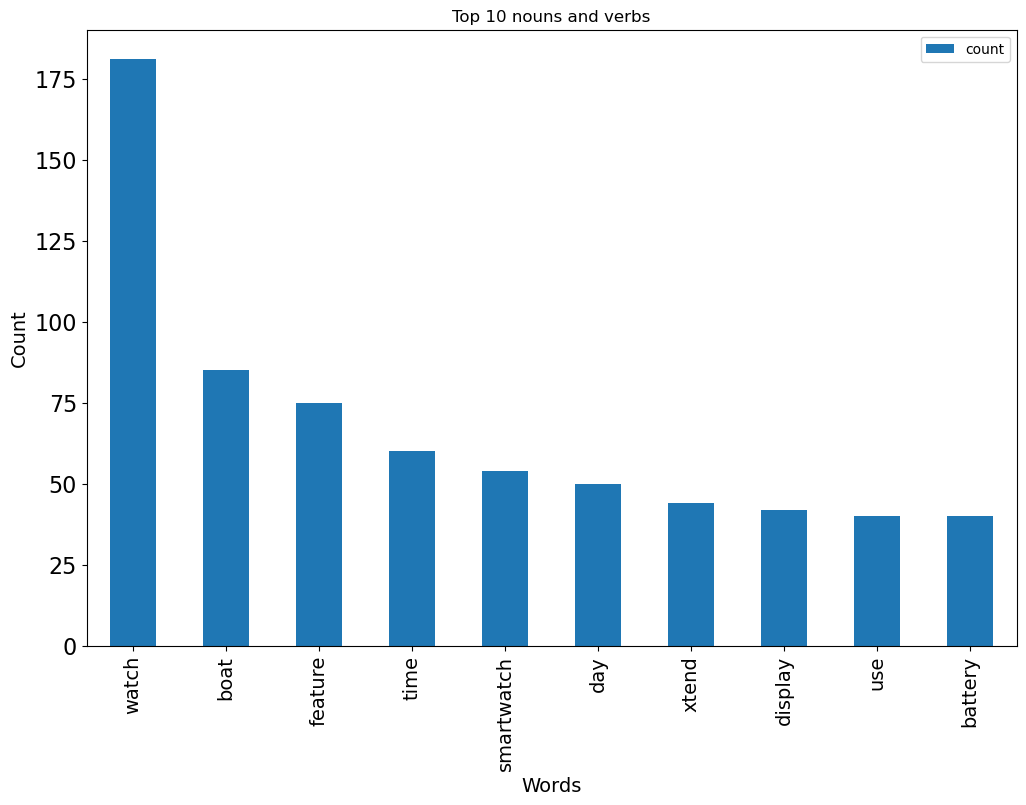

In [120]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


In [121]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [122]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [123]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [124]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,103
neg,4


In [125]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...,"[using, smart, watch, first, time, model, xten...",0.625833,0.262560
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452
2,good nice worth money super product,"very good ,nice worth money, super product","[good, nice, worth, money, super, product]",0.591667,0.483333
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...,"[look, good, easy, use, charging, fast, charge...",0.608333,0.320833
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266


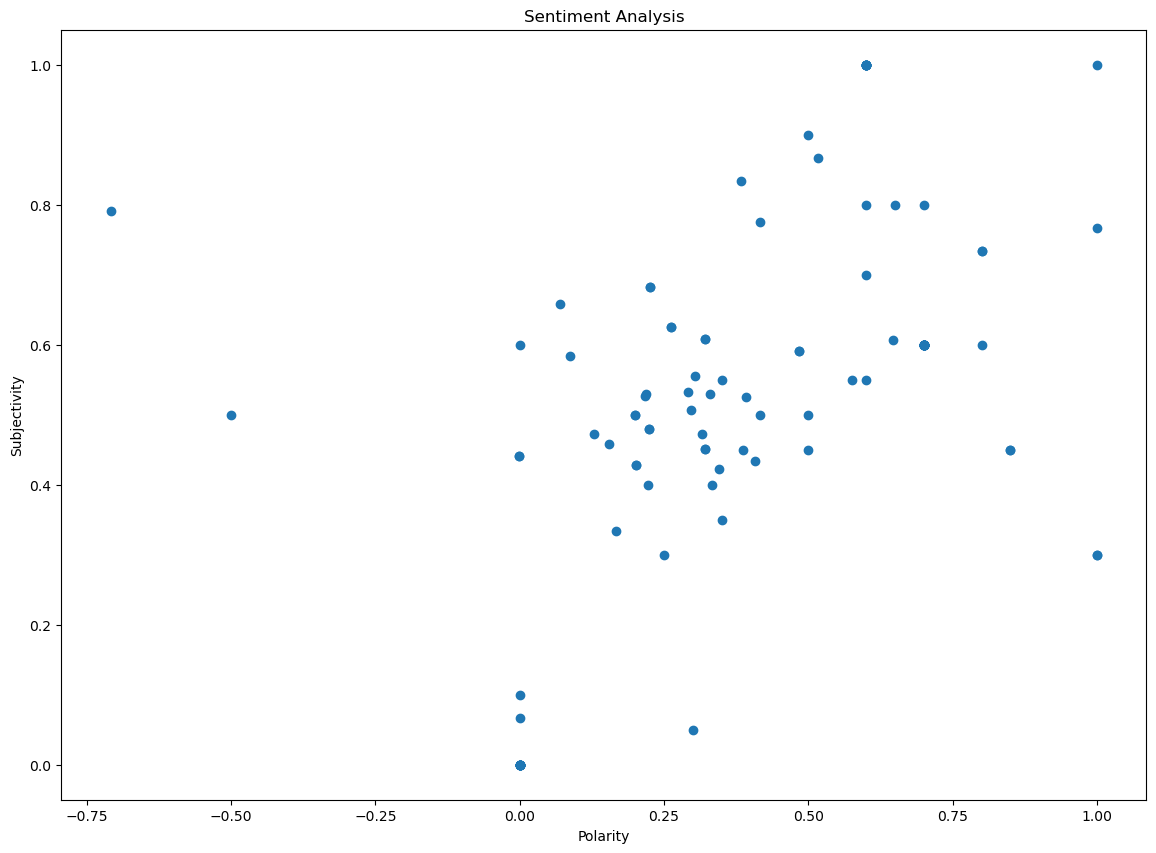

In [126]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [127]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...,"[using, smart, watch, first, time, model, xten...",0.625833,0.262560,pos
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452,pos
2,good nice worth money super product,"very good ,nice worth money, super product","[good, nice, worth, money, super, product]",0.591667,0.483333,pos
3,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...,"[look, good, easy, use, charging, fast, charge...",0.608333,0.320833,pos
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266,neg


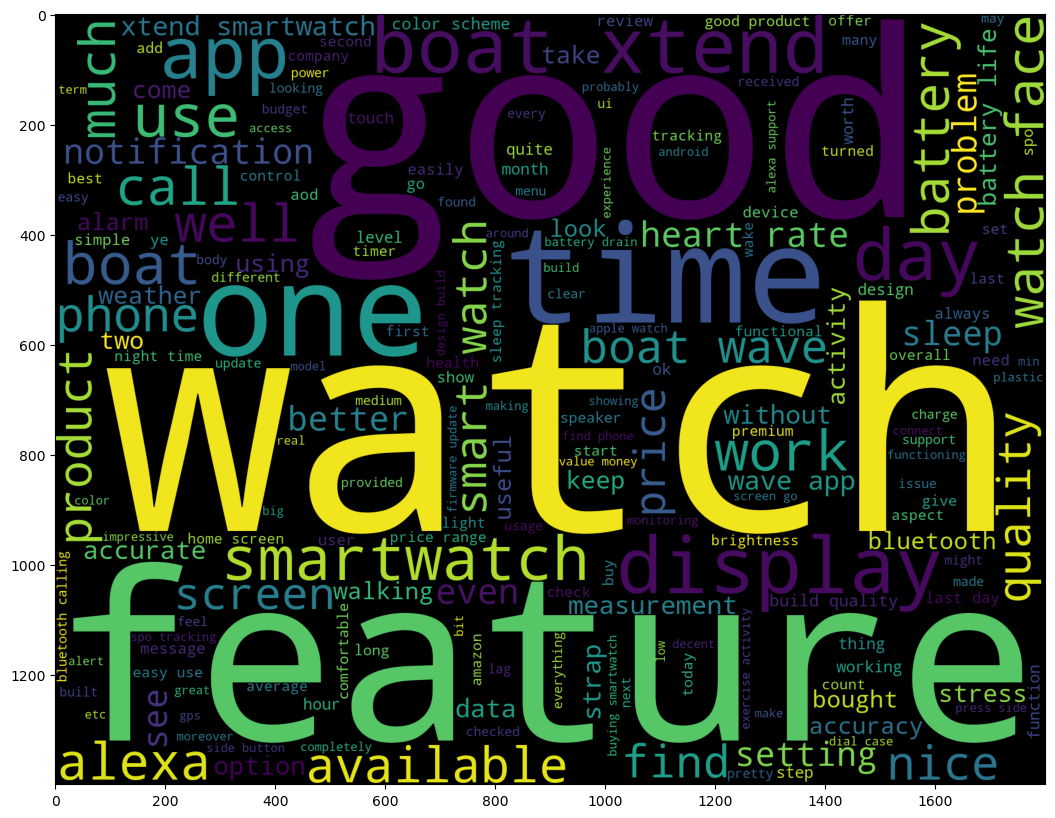

In [128]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);


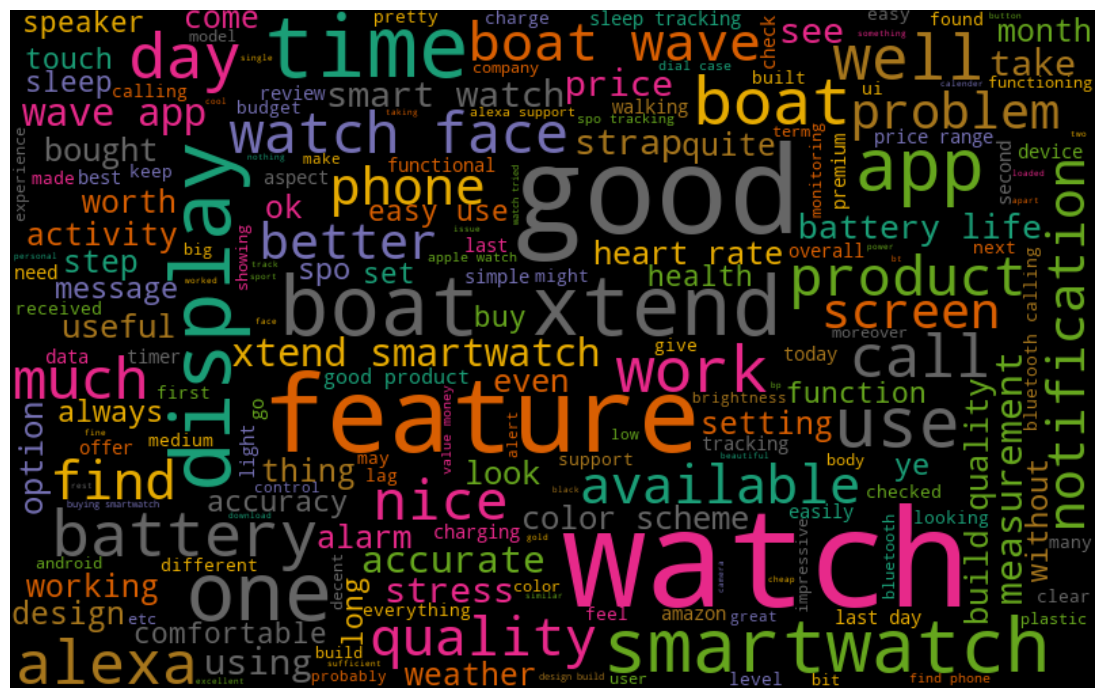

In [129]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

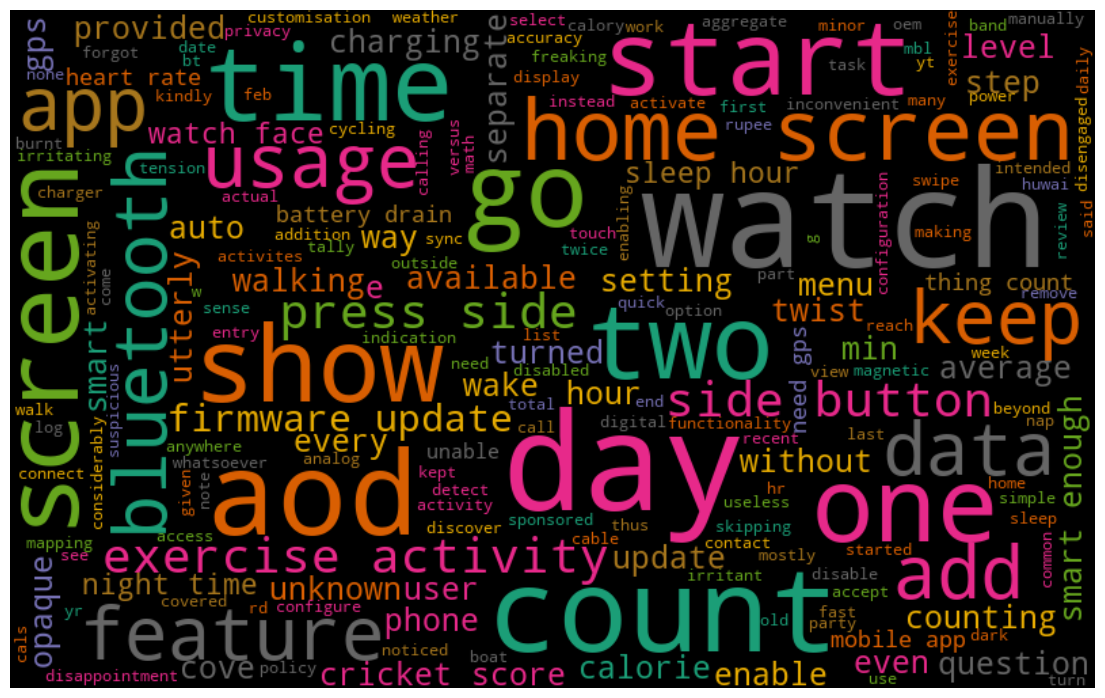

In [130]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)
